<a href="https://colab.research.google.com/github/jespimentel/acervo_sis_mp_integrado/blob/main/acervo_SISMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
acervo_pdf = '/content/drive/MyDrive/Datasets/consulta_acervo_2022_06_05.pdf'

In [2]:
!pip install tabula-py
import pandas as pd
import tabula
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
tabelas = tabula.read_pdf(acervo_pdf, pages='all')
print (len(tabelas))

Got stderr: Jun 05, 2022 2:38:04 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Jun 05, 2022 2:38:04 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



222


In [4]:
lista_tabelas=[]
for tabela in tabelas:
  lista_tabelas.append(tabela)

In [5]:
colunas = ['Tipo','Num. MP', 'Num. TJ', 'UA', 'Cargo', 'Localização Atual','Última Movimentação', 'Unnamed']
geral = pd.concat(lista_tabelas)
geral.columns = colunas
geral = geral[['Tipo','Num. MP', 'Num. TJ', 'Cargo', 'Localização Atual','Última Movimentação']]
geral['Num. MP'] = geral['Num. MP'].str.replace('\r', '')
geral['Num. TJ'] = geral['Num. TJ'].str.replace('\r', '')
geral['Cargo'] = geral['Cargo'].str.replace('\r', '')
geral['Localização Atual'] = geral['Localização Atual'].str.replace('\r', '')
geral['Última Movimentação'] = geral['Última Movimentação'].str.replace('\r', '')
geral.reset_index(inplace=True, drop=True)
geral = geral.dropna(subset=['Num. MP'])
geral['Físico?'] = geral['Num. TJ'].str[:2] != '15'

In [6]:
geral

,Tipo,Num. MP,Num. TJ,Cargo,Localização Atual,Última Movimentação,Físico?
0,IP,13.0001.0005671/2014-1,0044681-17.2014.8.26.0050,7o PROMOTOR DEJUSTIÇA DEPIRACICABA,03A V CRIM DEPIRACICABA,MANIFESTAÇÃODIVERSA,True
1,IP,13.0001.0006065/2020-9,1523687-78.2020.8.26.0050,10o PROMOTOR DEJUSTIÇA DEPIRACICABA,DIPO 4,PRORROGAÇÃODE PRAZO,False
2,IP,13.0001.0030095/2020-5,1531484-08.2020.8.26.0050,17o PROMOTOR DEJUSTIÇA DEPIRACICABA,Promotoria deJustiça dePiracicaba,MANIFESTAÇÃODIVERSA,False
3,IP,13.0002.0002003/2021-1,1506283-77.2021.8.26.0050,6o PROMOTOR DEJUSTIÇA DEPIRACICABA,DIPO 322,PRORROGAÇÃODE PRAZO,False
4,IP,13.0002.0002646/2021-8,1513064-18.2021.8.26.0050,6o PROMOTOR DEJUSTIÇA DEPIRACICABA,DIPO 4,MANIFESTAÇÃODIVERSA,False
...,...,...,...,...,...,...,...
4537,IP,13.0723.0030495/2020-2,1542390-18.2020.8.26.0451,17o PROMOTOR DEJUSTIÇA DEPIRACICABA,04A V CRIM DEPIRACICABA,DILIGÊNCIA,False
4538,IP,13.0723.0030502/2020-4,1546058-94.2020.8.26.0451,9o PROMOTOR DEJUSTIÇA DEPIRACICABA,02A V CRIM DEPIRACICABA,PRORROGAÇÃODE PRAZO,False
4539,IP,13.0723.0030515/2020-1,1545419-76.2020.8.26.0451,17o PROMOTOR DEJUSTIÇA DEPIRACICABA,17o PROMOTORDE JUSTIÇA DEPIRACICABA,PRORROGAÇÃODE PRAZO,False
4540,IP,13.0723.0030517/2020-1,1542591-10.2020.8.26.0451,15o PROMOTOR DEJUSTIÇA DEPIRACICABA,V DO JÚRI E DEEXECUÇÕESCRIMINAIS DEPIRACICABA,PRORROGAÇÃODE PRAZO,False


In [7]:
geral.to_excel('geral.xlsx')

In [8]:
acervo_geral_por_promotor = geral.groupby(['Cargo'])['Num. TJ'].count().sort_values(ascending=False)
acervo_geral_por_promotor

Cargo
7o PROMOTOR DEJUSTIÇA DEPIRACICABA             980
10o PROMOTOR DEJUSTIÇA DEPIRACICABA            737
17o PROMOTOR DEJUSTIÇA DEPIRACICABA            622
4o PROMOTOR DEJUSTIÇA DEPIRACICABA             535
6o PROMOTOR DEJUSTIÇA DEPIRACICABA             489
11o PROMOTOR DEJUSTIÇA DEPIRACICABA            467
9o PROMOTOR DEJUSTIÇA DEPIRACICABA             379
1o PROMOTOR DEJUSTIÇA AUXILIARDE PIRACICABA     94
15o PROMOTOR DEJUSTIÇA DEPIRACICABA             81
2o PROMOTOR DEJUSTIÇA DEPIRACICABA              65
1o PROMOTOR DEJUSTIÇA DEPIRACICABA              39
13o PROMOTOR DEJUSTIÇA DEPIRACICABA             31
14o PROMOTOR DEJUSTIÇA DEPIRACICABA              7
16o PROMOTOR DEJUSTIÇA DEPIRACICABA              1
2o PROMOTOR DEJUSTIÇA AUXILIARDE PIRACICABA      1
8o PROMOTOR DEJUSTIÇA DEPIRACICABA               1
Name: Num. TJ, dtype: int64

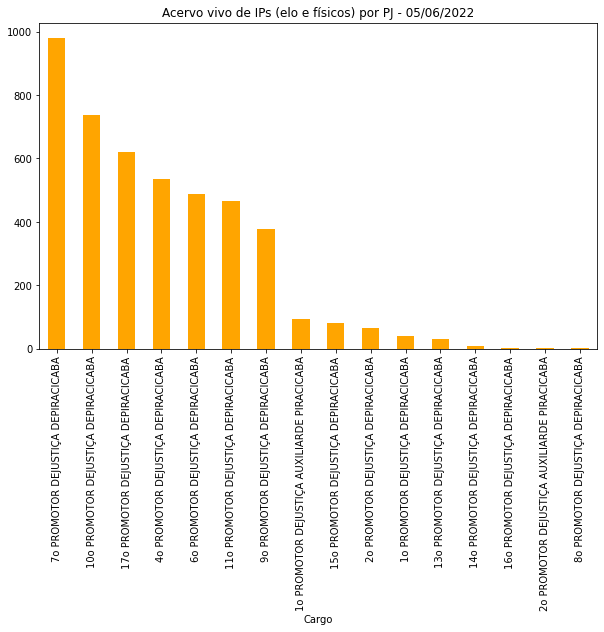

In [16]:
acervo_geral_por_promotor.plot.bar(title = 'Acervo vivo de IPs (elo e físicos) por PJ - 05/06/2022', figsize=(10,6), color='orange')
plt.savefig('IPs_acervo_vivo_por_PJ')
plt.show()

In [10]:
fisicos = geral[geral['Físico?'] == True]
fisicos

,Tipo,Num. MP,Num. TJ,Cargo,Localização Atual,Última Movimentação,Físico?
0,IP,13.0001.0005671/2014-1,0044681-17.2014.8.26.0050,7o PROMOTOR DEJUSTIÇA DEPIRACICABA,03A V CRIM DEPIRACICABA,MANIFESTAÇÃODIVERSA,True
5,IP,13.0002.0002729/2016-6,0064382-90.2016.8.26.0050,4o PROMOTOR DEJUSTIÇA DEPIRACICABA,DIPO 3,PRORROGAÇÃODE PRAZO,True
7,IP,13.0002.0004676/2014-1,0040277-20.2014.8.26.0050,11o PROMOTOR DEJUSTIÇA DEPIRACICABA,Promotoria deJustiça dePiracicaba,MANIFESTAÇÃODIVERSA,True
8,IP,13.0002.0005719/2016-4,0047393-09.2016.8.26.0050,7o PROMOTOR DEJUSTIÇA DEPIRACICABA,03A V CRIM DEPIRACICABA,PRORROGAÇÃODE PRAZO,True
9,IP,13.0002.0007566/2017-5,0077583-18.2017.8.26.0050,7o PROMOTOR DEJUSTIÇA DEPIRACICABA,03A V CRIM DEPIRACICABA,PRORROGAÇÃODE PRAZO,True
...,...,...,...,...,...,...,...
4483,IP,13.0723.0030122/2020-9,NaN,1o PROMOTOR DEJUSTIÇA AUXILIARDE PIRACICABA,Promotoria deJustiça dePiracicaba,NenhumaMovimentaçãoEncontrada,True
4502,IP,13.0723.0030224/2020-6,0017923-83.2019.8.26.0451,11o PROMOTOR DEJUSTIÇA DEPIRACICABA,01A V CRIM DEPIRACICABA,PRORROGAÇÃODE PRAZO,True
4523,IP,13.0723.0030388/2020-4,0010520-29.2020.8.26.0451,6o PROMOTOR DEJUSTIÇA DEPIRACICABA,01A V CRIM DEPIRACICABA,PRORROGAÇÃODE PRAZO,True
4529,IP,13.0723.0030443/2020-5,0010438-95.2020.8.26.0451,17o PROMOTOR DEJUSTIÇA DEPIRACICABA,04A V CRIM DEPIRACICABA,ACORDO DENÃOPERSECUÇÃOPENAL,True


In [11]:
geral[geral['Última Movimentação']=='ACORDO DENÃOPERSECUÇÃOPENAL'].groupby(['Cargo', 'Última Movimentação'])['Última Movimentação'].count().sort_values(ascending=False)

Cargo                                        Última Movimentação        
7o PROMOTOR DEJUSTIÇA DEPIRACICABA           ACORDO DENÃOPERSECUÇÃOPENAL    42
4o PROMOTOR DEJUSTIÇA DEPIRACICABA           ACORDO DENÃOPERSECUÇÃOPENAL    39
17o PROMOTOR DEJUSTIÇA DEPIRACICABA          ACORDO DENÃOPERSECUÇÃOPENAL    24
9o PROMOTOR DEJUSTIÇA DEPIRACICABA           ACORDO DENÃOPERSECUÇÃOPENAL    16
10o PROMOTOR DEJUSTIÇA DEPIRACICABA          ACORDO DENÃOPERSECUÇÃOPENAL    13
11o PROMOTOR DEJUSTIÇA DEPIRACICABA          ACORDO DENÃOPERSECUÇÃOPENAL    11
6o PROMOTOR DEJUSTIÇA DEPIRACICABA           ACORDO DENÃOPERSECUÇÃOPENAL     4
1o PROMOTOR DEJUSTIÇA AUXILIARDE PIRACICABA  ACORDO DENÃOPERSECUÇÃOPENAL     1
Name: Última Movimentação, dtype: int64

In [17]:
fisicos[fisicos['Última Movimentação']=='ACORDO DENÃOPERSECUÇÃOPENAL'].groupby(['Cargo', 'Última Movimentação'])['Última Movimentação'].count().sort_values(ascending=False)

Cargo                                        Última Movimentação        
4o PROMOTOR DEJUSTIÇA DEPIRACICABA           ACORDO DENÃOPERSECUÇÃOPENAL    7
17o PROMOTOR DEJUSTIÇA DEPIRACICABA          ACORDO DENÃOPERSECUÇÃOPENAL    4
1o PROMOTOR DEJUSTIÇA AUXILIARDE PIRACICABA  ACORDO DENÃOPERSECUÇÃOPENAL    1
7o PROMOTOR DEJUSTIÇA DEPIRACICABA           ACORDO DENÃOPERSECUÇÃOPENAL    1
9o PROMOTOR DEJUSTIÇA DEPIRACICABA           ACORDO DENÃOPERSECUÇÃOPENAL    1
Name: Última Movimentação, dtype: int64

In [12]:
acervo_fisico_por_promotor = fisicos.groupby(['Cargo'])['Num. TJ'].count().sort_values(ascending=False)
acervo_fisico_por_promotor

Cargo
7o PROMOTOR DEJUSTIÇA DEPIRACICABA             430
10o PROMOTOR DEJUSTIÇA DEPIRACICABA            343
4o PROMOTOR DEJUSTIÇA DEPIRACICABA             207
6o PROMOTOR DEJUSTIÇA DEPIRACICABA             203
11o PROMOTOR DEJUSTIÇA DEPIRACICABA            132
17o PROMOTOR DEJUSTIÇA DEPIRACICABA            104
9o PROMOTOR DEJUSTIÇA DEPIRACICABA              99
1o PROMOTOR DEJUSTIÇA AUXILIARDE PIRACICABA     46
1o PROMOTOR DEJUSTIÇA DEPIRACICABA              37
15o PROMOTOR DEJUSTIÇA DEPIRACICABA             16
13o PROMOTOR DEJUSTIÇA DEPIRACICABA             12
2o PROMOTOR DEJUSTIÇA DEPIRACICABA               8
14o PROMOTOR DEJUSTIÇA DEPIRACICABA              6
8o PROMOTOR DEJUSTIÇA DEPIRACICABA               1
Name: Num. TJ, dtype: int64

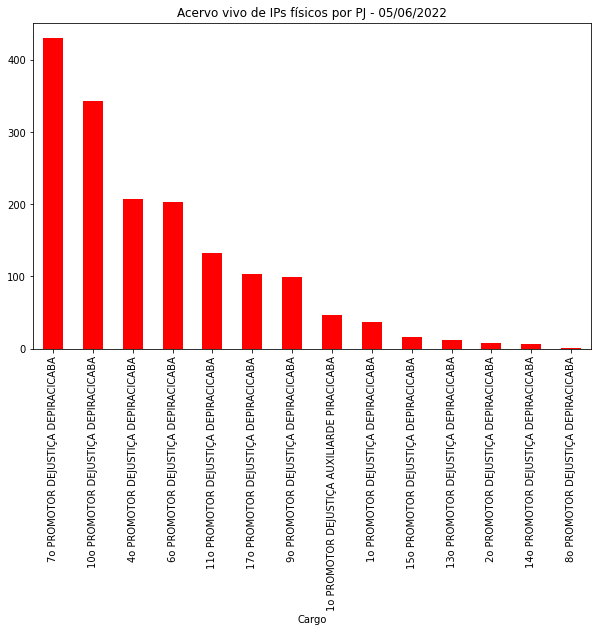

In [13]:
acervo_fisico_por_promotor.plot.bar(title = 'Acervo vivo de IPs físicos por PJ - 05/06/2022', figsize=(10,6), color = 'red')
plt.savefig('IPs_físicos_acervo_vivo_por_PJ.jpg')
plt.show()